KLASIFIKASI PCOS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
import pandas as pd;
data_pcos = pd.read_csv("/content/PCOS_data.csv")
label_pcos = data_pcos["PCOS (Y/N)"]
data_pcos.drop(["Sl. No","Patient File No.","PCOS (Y/N)","Unnamed: 44","II    beta-HCG(mIU/mL)","AMH(ng/mL)"],axis = 1,inplace = True)
data_pcos["Marraige Status (Yrs)"].fillna(data_pcos['Marraige Status (Yrs)'].describe().loc[['50%']][0], inplace = True)
data_pcos["Fast food (Y/N)"].fillna(1, inplace = True)

print("PCOS dataset:\n",data_pcos.shape[0],"Records\n",data_pcos.shape[1],"Features")

PCOS dataset:
 541 Records
 39 Features


In [ ]:
display(data_pcos.head(10))
print("The features in this dataset have both discrete and continuous values")

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,36,74.1,165.0,27.2,15,78,28,11.20,2,5,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,34,64.0,156.0,26.3,11,72,18,10.90,2,5,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8
7,33,58.5,159.0,23.1,13,72,20,11.00,2,5,...,0,0.0,0,120,80,7,6,15.0,18.0,7.1
8,32,40.0,158.0,16.0,11,72,18,11.80,2,5,...,0,0.0,0,120,80,5,7,17.0,17.0,4.2
9,36,52.0,150.0,23.1,15,80,20,10.00,4,2,...,0,0.0,0,110,80,1,1,14.0,17.0,2.5


The features in this dataset have both discrete and continuous values


In [ ]:
score4 = acc_score(data_pcos,label_pcos)
score4

,Classifier,Accuracy
0,RandomForest,0.889706
1,Logistic,0.860294
2,AdaBoost,0.860294
3,GradientBoosting,0.860294
4,LinearSVM,0.852941
5,DecisionTree,0.838235
6,RadialSVM,0.698529
7,KNeighbors,0.676471


In [ ]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train,X_test, Y_train, Y_test = split(data_pcos,label_pcos)
chromo_df_pcos, score_pcos = generations(data_pcos, label_pcos, size=80, n_feat=data_pcos.shape[1], n_parents=64, mutation_rate=0.20, n_gen=20,
                         X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)


Best score in generation 1 : [0.9117647058823529]
Best score in generation 2 : [0.9044117647058824]
Best score in generation 3 : [0.9117647058823529]
Best score in generation 4 : [0.9044117647058824]
Best score in generation 5 : [0.9044117647058824]
Best score in generation 6 : [0.9044117647058824]
Best score in generation 7 : [0.9191176470588235]
Best score in generation 8 : [0.9117647058823529]
Best score in generation 9 : [0.9117647058823529]
Best score in generation 10 : [0.9117647058823529]
Best score in generation 11 : [0.9191176470588235]
Best score in generation 12 : [0.9117647058823529]
Best score in generation 13 : [0.9117647058823529]
Best score in generation 14 : [0.9117647058823529]
Best score in generation 15 : [0.9117647058823529]
Best score in generation 16 : [0.9264705882352942]
Best score in generation 17 : [0.9044117647058824]
Best score in generation 18 : [0.9264705882352942]
Best score in generation 19 : [0.9044117647058824]
Best score in generation 20 : [0.9117647

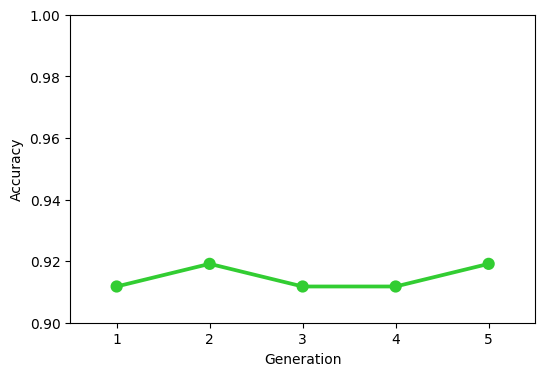

In [ ]:
plot(score_pcos,0.9,1.0,c = "limegreen")

In [ ]:
# Extract the best chromosome from the last generation
best_chromosome = chromo_df_pcos[-1]

# Filter the training and test data based on the selected features
X_train_selected = X_train.iloc[:, best_chromosome]
X_test_selected = X_test.iloc[:, best_chromosome]

# Train the RandomForestClassifier using the selected features
logmodel.fit(X_train_selected, Y_train)

# Predict on the test set
Y_pred = logmodel.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {accuracy}")

# Y_probabilities = logmodel.predict_proba(X_test_selected)

# If you want to print or use the predicted values
print("Predicted values:", Y_pred)


Accuracy on test set: 0.9191176470588235
Predicted values: [0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0]


In [ ]:

# Filter the test data based on the selected features
X_test_selected = X_test.iloc[:, best_chromosome]

# Predict on the test set
Y_pred = logmodel.predict(X_test_selected)

# Create a DataFrame to display actual and predicted values
result_df = pd.DataFrame({'Actual PCOS (Y/N)': Y_test, 'Predicted PCOS (Y/N)': Y_pred})

# Print the result DataFrame
print(result_df)


     Actual PCOS (Y/N)  Predicted PCOS (Y/N)
229                  0                     0
73                   0                     0
352                  1                     0
86                   0                     0
470                  1                     1
..                 ...                   ...
380                  0                     0
204                  0                     0
172                  0                     0
211                  1                     1
360                  0                     0

[136 rows x 2 columns]


In [ ]:
# Print the PCOS labels in the specified format
for index, row in result_df.iterrows():
    print(f"PCOS (Y/N) = {row['Actual PCOS (Y/N)']}, Predicted = {row['Predicted PCOS (Y/N)']}")


PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 1, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 1
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 0, Predicted = 1
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 0, Predicted = 0
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N) = 1, Predicted = 1
PCOS (Y/N)